In [63]:
import pandas as pd

In [64]:
f=pd.read_csv('/home/sky/Documents/case_study/training.csv', index_col=23)

In [65]:
f.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit
id,,,,,,,,,,,,,,,,,,,,,
1,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0,no,NaN
2,31.0,services,single,high.school,no,no,no,cellular,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0,no,NaN
3,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,...,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0,no,NaN
4,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,...,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no,NaN
5,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,...,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0,no,NaN


In [66]:
f.dtypes

custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail           int64
responded          object
profit            float64
dtype: object

In [67]:
import seaborn as sns
%matplotlib inline
import ggplot

In [68]:
f['profession']=f['profession'].astype('category')

In [69]:
f.dtypes

custAge            float64
profession        category
marital             object
schooling           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
pmonths            float64
pastEmail            int64
responded           object
profit             float64
dtype: object

In [70]:
def object2cat(f):
    object_cols=f.select_dtypes(['object']).columns
    f[object_cols]=f[object_cols].apply(lambda x:x.astype('category'))
    return f
f=object2cat(f)
f.dtypes

custAge            float64
profession        category
marital           category
schooling         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
pmonths            float64
pastEmail            int64
responded         category
profit             float64
dtype: object

In [71]:
def cat2dummies(f):
    category_cols=f.select_dtypes(include=['category']).columns
    ex_category_cols=f.select_dtypes(exclude=['category']).columns
    temp_df= pd.get_dummies(f[category_cols],prefix='is')
    #temp_df.append(f[ex_category_cols],axis=1)
    #return temp_df
    all_df=pd.concat([temp_df,f[ex_category_cols]],axis=1)
    return all_df
cat2dummies(f)
    

,is_admin.,is_blue-collar,is_entrepreneur,is_housemaid,is_management,is_retired,is_self-employed,is_services,is_student,is_technician,...,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,999,0,-1.8,93.075,-47.1,1.498,5099.1,999.000000,0,NaN
2,0,0,0,0,0,0,0,1,0,0,...,999,0,1.4,93.918,-42.7,4.968,5228.1,999.000000,0,NaN
3,1,0,0,0,0,0,0,0,0,0,...,999,0,1.4,94.465,-41.8,4.961,5228.1,999.000000,0,NaN
4,1,0,0,0,0,0,0,0,0,0,...,999,0,1.4,93.918,-42.7,4.962,5228.1,999.000000,0,NaN
5,0,1,0,0,0,0,0,0,0,0,...,999,0,1.4,93.918,-42.7,4.961,5228.1,999.000000,0,NaN
6,0,0,1,0,0,0,0,0,0,0,...,999,0,1.4,94.465,-41.8,4.866,5228.1,999.000000,0,NaN
7,0,0,0,0,0,0,0,0,0,1,...,999,0,1.4,93.918,-42.7,4.961,5228.1,999.000000,0,NaN
8,0,0,0,0,0,0,0,0,0,1,...,999,0,-3.4,92.431,-26.9,0.741,5017.5,999.000000,0,NaN
9,0,1,0,0,0,0,0,0,0,0,...,999,0,1.4,94.465,-41.8,4.959,5228.1,999.000000,0,NaN


In [72]:
def cat2code(f):
    category_cols=f.select_dtypes(['category']).columns
    f[category_cols]=f[category_cols].apply(lambda x:x.cat.codes)
    return f
f=cat2code(f)


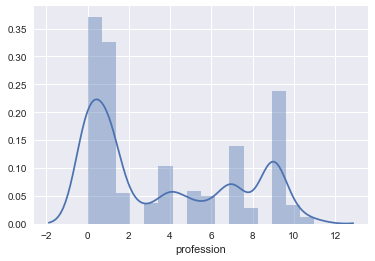

In [29]:
sns.distplot(f['profession'])
#univariate plot

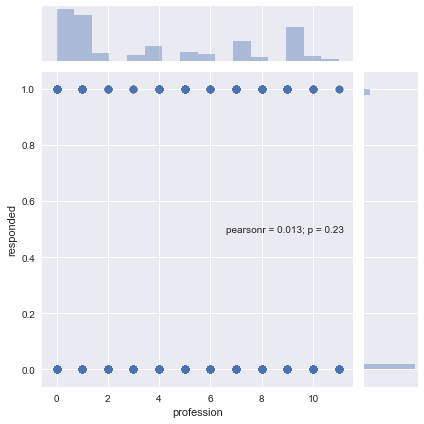

In [30]:
sns.jointplot(x="profession",y="responded",data=f)

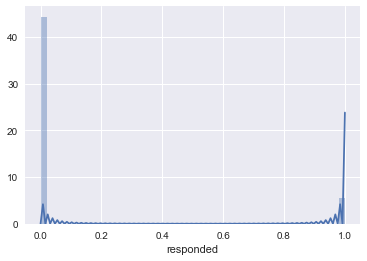

In [35]:
sns.distplot(f['responded'])

In [36]:
f.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit
id,,,,,,,,,,,,,,,,,,,,,
1,34.0,0,2,6,0,0,2,0,0,4,...,1,-1.8,93.075,-47.1,1.498,5099.1,999.0,0,0,NaN
2,31.0,7,2,3,0,0,0,0,3,2,...,1,1.4,93.918,-42.7,4.968,5228.1,999.0,0,0,NaN
3,NaN,0,2,3,0,0,0,1,4,-1,...,1,1.4,94.465,-41.8,4.961,5228.1,999.0,0,0,NaN
4,52.0,0,0,6,1,2,0,0,3,3,...,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0,NaN
5,39.0,1,2,-1,1,2,0,0,3,3,...,1,1.4,93.918,-42.7,4.961,5228.1,999.0,0,0,NaN
